# Bitcoin Prediction

## 1. Import Necessary Libraries

In [16]:
from cbr_fox.builder.cbr_fox_builder import cbr_fox_builder
from cbr_fox.core import cbr_fox
from cbr_fox.custom_distance.cci_distance import cci_distance
import numpy as np

## 2. Load the Saved Data   

In [23]:
# Load the saved data
data = np.load("../examples/Bitcoin_prediction/Bitcoin_Prediction.npz")

In [25]:
componentsLen

3

## 3. Retrieve Variables from the Data

In [18]:
# Retrieve each variable
training_windows = data['training_windows']
forecasted_window = data['forecasted_window']
target_training_windows = data['target_training_windows']
windowsLen = data['windowsLen'].item()  # Extract single value from array
componentsLen = data['componentsLen'].item()
windowLen = data['windowLen'].item()
prediction = data['prediction']

## 4. Define CBR-FoX Techniques

In [19]:
# Define the CBR-FoX techniques with custom distance metrics
techniques = [
    cbr_fox.cbr_fox(metric=cci_distance, kwargs={"punishedSumFactor": 0.5})
    #cbr_fox.cbr_fox(metric="edr"),
    #cbr_fox.cbr_fox(metric="dtw"),
    #cbr_fox.cbr_fox(metric="twe")
]

## 5. Build and Train the CBR-FoX Model

In [20]:
# Initialize the CBR-FoX builder
p = cbr_fox_builder(techniques)

# Train the model with the provided data
p.fit(training_windows = training_windows,target_training_windows = target_training_windows, forecasted_window = forecasted_window)

2025-08-27 12:56:19,487 - INFO - Analizando conjunto de datos
2025-08-27 12:56:19,488 - INFO - Calculando Correlación
Windows procesadas:   0%|          | 0/2774 [00:00<?, ?it/s]2025-08-27 12:56:19,493 - INFO - Aplicando Correlación de Pearson
2025-08-27 12:56:19,493 - WARNING - Failed with sktime metric: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Windows procesadas:   0%|          | 0/2774 [00:00<?, ?it/s]
2025-08-27 12:56:19,494 - INFO - Aplicando Correlación de Pearson
Windows procesadas:   0%|          | 0/2774 [00:00<?, ?it/s]C:\Users\jerry\Documents\GitHub\CBR-FoX\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jerry\Documents\GitHub\CBR-FoX\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
Windows procesadas: 100%|███████

## 6. Make Predictions

In [21]:
# Make predictions and generate explanations
p.predict(prediction = prediction,num_cases=3)

2025-08-27 12:56:23,598 - INFO - Generando reporte de análisis


## 7. Visualize Results

[[(<Figure size 640x480 with 1 Axes>,
   <Axes: title={'center': 'Visualization of CBR-FoX for Bitcoin Prediction'}, xlabel='Windows', ylabel='Correlation'>),
  (<Figure size 640x480 with 1 Axes>,
   <Axes: title={'center': 'Visualization of CBR-FoX for Bitcoin Prediction'}, xlabel='Windows', ylabel='Correlation'>),
  (<Figure size 640x480 with 1 Axes>,
   <Axes: title={'center': 'Visualization of CBR-FoX for Bitcoin Prediction'}, xlabel='Windows', ylabel='Correlation'>)]]

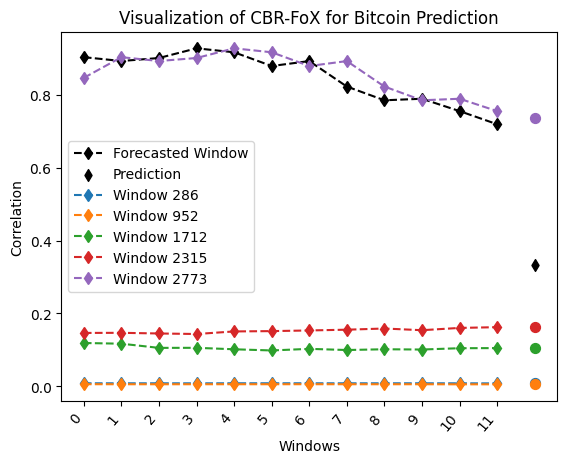

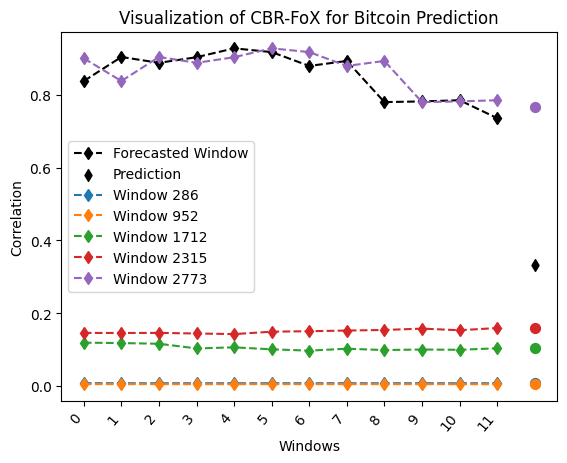

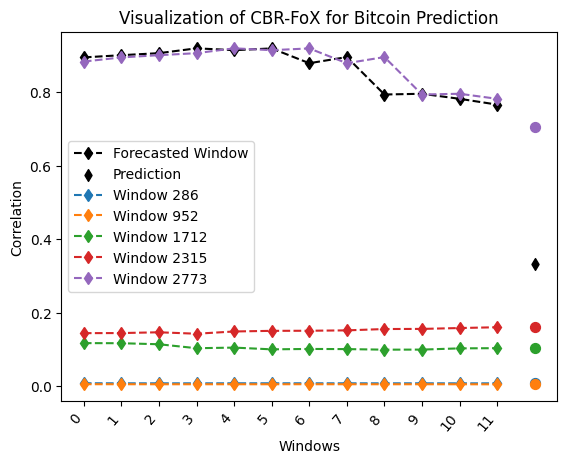

In [27]:
# Visualize the predictions and results
p.visualize_pyplot(
    fmt = '--d',
    scatter_params={"s": 50},
    xtick_rotation=50,
    title="Visualization of CBR-FoX for Bitcoin Prediction",
    xlabel="Windows",
    ylabel="Correlation"
)